# Analise de dados de Concentração de gás

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Classes dos modelo
#from sklearn.linear_model import LogisticRegression, LinearRegression
# Classes do modelo
from sklearn.neighbors import KNeighborsClassifier

# Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# sns.set_theme(style="whitegrid")

### Carregando o dataset

In [46]:
dataset = pd.read_csv("CONCENTRAÇAO_GAS.csv")
#dataset.head(5)



In [47]:
# normalizando o dataset:
X = dataset.drop(["Class"], axis=1)
X_norm = (X - X.min())/ ( X.max() - X.min()) 
X_norm.head()
y = dataset["Class"].copy() # copia a coluna de classes


## Treinamento do modelo KNN

In [48]:

X_train, X_test, y_train, y_test = train_test_split(X_norm.values, y.values, test_size=0.30, random_state=199)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.70, shuffle=False)

# vamos criar um classificador kNN:
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(X_train, y_train)

# e ver a sua performance no dataset de teste
print(classification_report(y_test, model_knn.predict(X_test)))




              precision    recall  f1-score   support

           1       1.00      0.99      0.99       560
           2       1.00      0.99      1.00       610
           3       0.99      1.00      1.00       369
           4       1.00      0.99      1.00       408
           5       0.99      1.00      0.99       636
           6       0.97      0.99      0.98       339

    accuracy                           0.99      2922
   macro avg       0.99      0.99      0.99      2922
weighted avg       0.99      0.99      0.99      2922



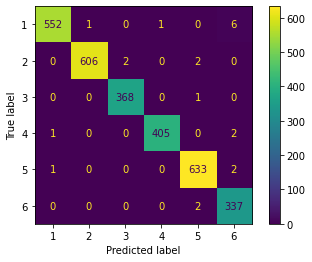

In [49]:
# MATRIZ CONFUSÃO: retorna uma matriz com a contagem de como cada uma das classes está sendo classificada corretamente ou erroneamente
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(model_knn, X_test, y_test)

C:\Users\ADRIANA\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


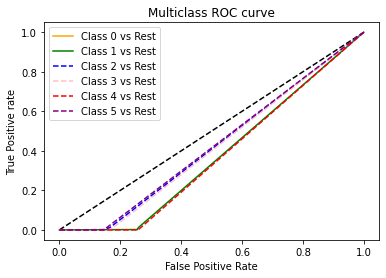

In [50]:
# curva roc:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

pred = model_knn.predict(X_test)
pred_prob = model_knn.predict_proba(X_test)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
plt.plot(fpr[0], tpr[0], linestyle='-',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='-',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 5 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=400); 








    


In [51]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob, multi_class='ovr')
auc_score1

0.9988359044620858

# VALIDAÇÃO DO MODELO:

In [52]:
#na função _train_testsplit é o stratify. Ele controla se a proporção das classes no dataset de treino e 
# teste deve ser mantida e tenta selecionar as instâncias que estão faltando para se aproximar da distribuição original.


def print_distribution(arr, print_nl=True):
    arr = np.unique(arr, return_counts=True)[1] / arr.count()
    for i in range(arr.shape[0]):
        print("Classe %d: %.2f%%" %(i, arr[i]*100))

    if print_nl:
        print("\n")

_, _, y_train, _ = train_test_split(X_norm, y, test_size=0.3, random_state=199)
_, _, y_train_strat, _ = train_test_split(X_norm, y, test_size=0.3, random_state=199, stratify=y)

print("Proporções por classe no dataset em geral:")
print_distribution(y)

print("Proporções por classe no dataset de treino sem estratificação:")
print_distribution(y_train)

print("Proporções por classe no dataset de treino com estratificação:")
print_distribution(y_train_strat, print_nl=False)

Proporções por classe no dataset em geral:
Classe 0: 18.44%
Classe 1: 21.04%
Classe 2: 11.80%
Classe 3: 13.92%
Classe 4: 21.63%
Classe 5: 13.18%


Proporções por classe no dataset de treino sem estratificação:
Classe 0: 18.34%
Classe 1: 21.00%
Classe 2: 11.41%
Classe 3: 13.92%
Classe 4: 21.49%
Classe 5: 13.84%


Proporções por classe no dataset de treino com estratificação:
Classe 0: 18.45%
Classe 1: 21.03%
Classe 2: 11.80%
Classe 3: 13.92%
Classe 4: 21.63%
Classe 5: 13.18%


In [53]:
from sklearn.model_selection import StratifiedKFold

#print("Proporções por classe no dataset em geral:")
#print_distribution(y)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=199)

fold = 0
for train, test in kf.split(X, y):
    print("Fold %d" %(fold))
    print_distribution(y[train], print_nl=(fold != 2))
    fold += 1

Fold 0
Classe 0: 18.44%
Classe 1: 21.03%
Classe 2: 11.80%
Classe 3: 13.91%
Classe 4: 21.64%
Classe 5: 13.18%


Fold 1
Classe 0: 18.44%
Classe 1: 21.03%
Classe 2: 11.80%
Classe 3: 13.91%
Classe 4: 21.63%
Classe 5: 13.18%


Fold 2
Classe 0: 18.44%
Classe 1: 21.03%
Classe 2: 11.80%
Classe 3: 13.91%
Classe 4: 21.63%
Classe 5: 13.18%
Fold 3
Classe 0: 18.44%
Classe 1: 21.03%
Classe 2: 11.80%
Classe 3: 13.91%
Classe 4: 21.63%
Classe 5: 13.18%


Fold 4
Classe 0: 18.44%
Classe 1: 21.03%
Classe 2: 11.80%
Classe 3: 13.91%
Classe 4: 21.63%
Classe 5: 13.18%


Fold 5
Classe 0: 18.44%
Classe 1: 21.03%
Classe 2: 11.80%
Classe 3: 13.91%
Classe 4: 21.63%
Classe 5: 13.18%


Fold 6
Classe 0: 18.44%
Classe 1: 21.04%
Classe 2: 11.79%
Classe 3: 13.92%
Classe 4: 21.63%
Classe 5: 13.18%


Fold 7
Classe 0: 18.44%
Classe 1: 21.04%
Classe 2: 11.80%
Classe 3: 13.92%
Classe 4: 21.63%
Classe 5: 13.17%


Fold 8
Classe 0: 18.44%
Classe 1: 21.04%
Classe 2: 11.80%
Classe 3: 13.92%
Classe 4: 21.63%
Classe 5: 13.17%


Fol

In [54]:
from sklearn.model_selection import StratifiedKFold

def evaluate_model_with_kfold(kf):
    accuracies_list = []
    for train, test in kf.split(X, y):
        model_knn = KNeighborsClassifier(n_neighbors=7)
        model_knn.fit(X_train, y_train)
        accuracies_list.append(model_knn.score(X_test, y_test))

    accuracies = np.array(accuracies_list)
    print("Acurácia média (desvio): %.4f +- (%.4f)" %(accuracies.mean(), accuracies.std()))

evaluate_model_with_kfold(StratifiedKFold(n_splits=10, shuffle=True, random_state=199))

Acurácia média (desvio): 0.9928 +- (0.0000)


# Encontrando os parâmetros para o modelo KNN através do GridSearch:

In [56]:
from sklearn.model_selection import GridSearchCV, PredefinedSplit

model = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1,11),
              'metric': ['euclidean', 'manhattan', 'minkowski']
              }


gs = GridSearchCV(model, param_grid, refit= False, cv=PredefinedSplit([-1]*len(X_train) + [0]*len(X_val)),
                  n_jobs=-1)
gs.fit(np.r_[X_train, X_val], np.r_[y_train, y_val])

print('Best hyperparameters:', gs.best_params_)

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 1}


# Validando o modelo KNN com os parâmetros otimizados pelo GridSearch:

In [57]:
gs = KNeighborsClassifier(n_neighbors=gs.best_params_['n_neighbors'], 
                                   metric=gs.best_params_['metric'])

gs.fit(X_train,y_train)                                   

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [58]:
#calculando as acuracias com os parametros otimizados:
print('Train accuracy: {:.1%}'.format(gs.score(X_train, y_train)))
print('  Val accuracy: {:.1%}'.format(gs.score(X_val, y_val)))
print(' Test accuracy: {:.1%}'.format(gs.score(X_test, y_test)))

Train accuracy: 100.0%
  Val accuracy: 99.6%
 Test accuracy: 99.7%


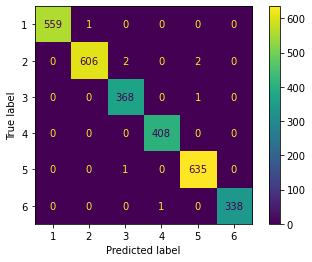

In [60]:
# MATRIZ CONFUSÃO COM OS PARAMETROS OTIMIZADOS:
#plot_confusion_matrix(gs, X_test, y_test, colorbar=False, cmap = 'Reds');
plot_confusion_matrix(gs, X_test, y_test)
plt.grid(False)
#plt.savefig('Gs_knn.png', dpi=200)

In [61]:
print(classification_report(y_test, gs.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       560
           2       1.00      0.99      1.00       610
           3       0.99      1.00      0.99       369
           4       1.00      1.00      1.00       408
           5       1.00      1.00      1.00       636
           6       1.00      1.00      1.00       339

    accuracy                           1.00      2922
   macro avg       1.00      1.00      1.00      2922
weighted avg       1.00      1.00      1.00      2922

